In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import sys
sys.path.insert(0,"/home/wouter/Projects/Clustering/algorithms")

### K-Means vs FCM
-> overlapping clusters

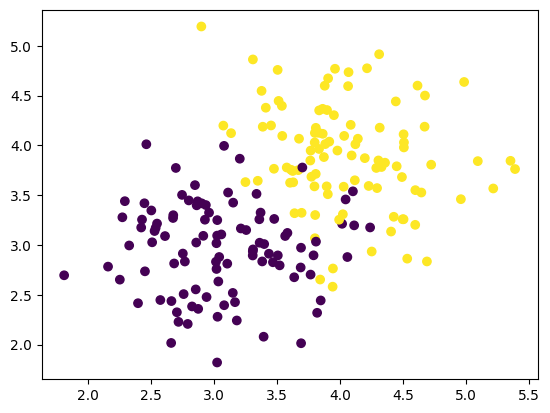

In [2]:
centers = [(3, 3), (4, 3.8)] 

X, y = make_blobs(
    n_samples=200, 
    centers=centers, 
    cluster_std=0.5, 
    random_state=4
)
plt.scatter(X[:,0], X[:,1],c=y);

K-Means results

In [3]:
from k_means import KMeans

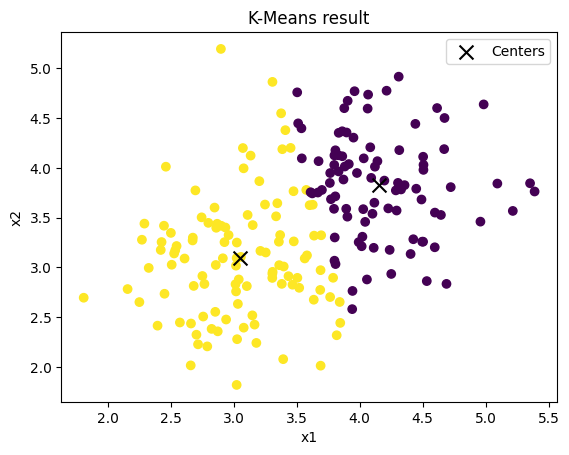

In [4]:
# init params
k = 2
max_iter=100
n_init=10

# load class & predict
KM_clustering = KMeans(k,max_iter,n_init)
labels = KM_clustering.fit_predict(X)
V_KM = KM_clustering.centroids_
plt.scatter(X[:,0],X[:,1],c=labels);
plt.scatter(V_KM[:, 0], V_KM[:, 1], marker='x', c='black', s=100, label='Centers')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("K-Means result")
plt.show()

FCM Results

In [5]:
from fuzzy_c_means import FCM

In [6]:
# load class & predict
FCM_clustering = FCM(c=2,m=2)
U_FCM = FCM_clustering.fit_predict(X)
V_FCM = FCM_clustering.V_

converged


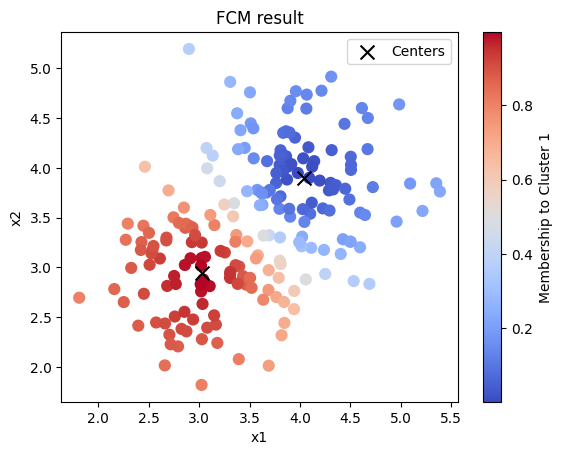

In [7]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=U_FCM[0], cmap='coolwarm', s=60)

cbar = plt.colorbar(scatter)
cbar.set_label('Membership to Cluster 1')

plt.scatter(V_FCM[:, 0], V_FCM[:, 1], marker='x', c='black', s=100, label='Centers')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("FCM result")
plt.show()

Put together

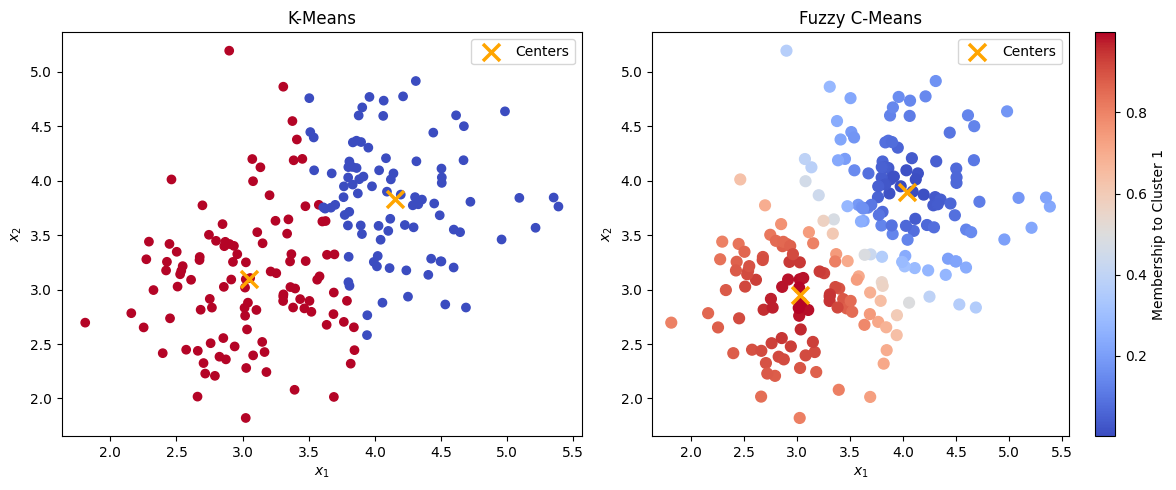

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-MEANS PLOT
ax1 = axes[0]
ax1.scatter(X[:,0], X[:,1], c=labels, cmap="coolwarm")
ax1.scatter(V_KM[:, 0], V_KM[:, 1], marker='x', c='orange', s=150, linewidths=2.5,label='Centers')
ax1.legend()
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title("K-Means")

# FCM PLOT
ax2 = axes[1]
scatter = ax2.scatter(X[:, 0], X[:, 1], c=U_FCM[0], cmap='coolwarm', s=60)
ax2.scatter(V_FCM[:, 0], V_FCM[:, 1], marker='x', c='orange', s=150, linewidths=2.5, label='Centers')

cbar = fig.colorbar(scatter, ax=ax2)
cbar.set_label('Membership to Cluster 1')

ax2.legend()
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title("Fuzzy C-Means")

plt.tight_layout()
plt.show()

### FCM vs PCM
-> datasets with outliers and noise

Data

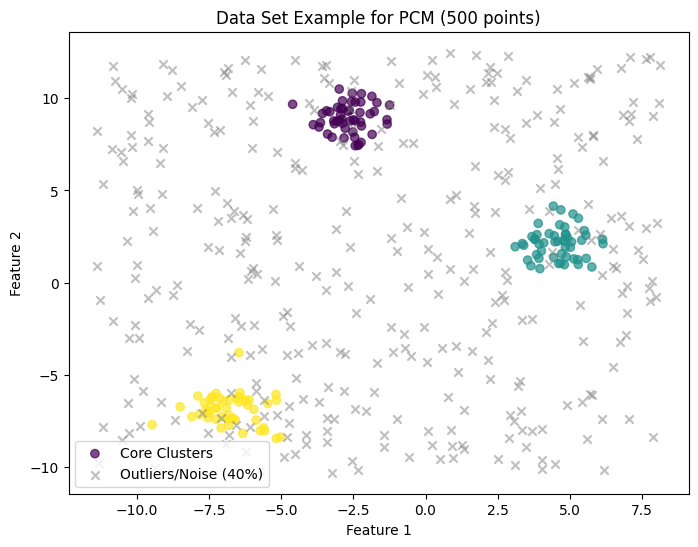

In [21]:
N_SAMPLES = 500
N_CLUSTERS = 3
NOISE_RATIO = 0.7


# 1. Generate the core clusters (60% of data)
n_clustered = int(N_SAMPLES * (1 - NOISE_RATIO))
X_clustered, y_clustered = make_blobs(
    n_samples=n_clustered,
    centers=N_CLUSTERS,
    cluster_std=0.8, # Small standard deviation for tight clusters
    random_state=42
)

# 2. Generate noise points (40% of data)
n_noise = N_SAMPLES - n_clustered
# Define the bounds of the clustered data to scatter the noise within/around it
x_min, x_max = X_clustered[:, 0].min(), X_clustered[:, 0].max()
y_min, y_max = X_clustered[:, 1].min(), X_clustered[:, 1].max()

# Scatter noise points uniformly across the data space
X_noise = np.column_stack([
    np.random.uniform(x_min - 2, x_max + 2, n_noise),
    np.random.uniform(y_min - 2, y_max + 2, n_noise)
])

# Combine the data
X_combined = np.vstack([X_clustered, X_noise])
y_labels = np.hstack([y_clustered, np.full(n_noise, -1)]) # -1 for noise points

# Scatter plot of the generated data
plt.figure(figsize=(8, 6))
# Plot clusters in different colors
plt.scatter(X_clustered[:, 0], X_clustered[:, 1], c=y_clustered, marker='o', label='Core Clusters', alpha=0.7)
# Plot noise in a distinct color
plt.scatter(X_noise[:, 0], X_noise[:, 1], c='gray', marker='x', label='Outliers/Noise (40%)', alpha=0.5)
plt.title(f'Data Set Example for PCM ({N_SAMPLES} points)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

FCM

In [33]:
# Load class & predict
FCM_clustering = FCM(c=3,m=2)
U_FCM = FCM_clustering.fit_predict(X_combined)
V_FCM = FCM_clustering.V_

# Plot
V_FCM

converged


array([[-3.46907703,  8.55348269],
       [-5.42723088, -6.13187732],
       [ 4.21831229,  1.90303695]])

Visualize FCM results

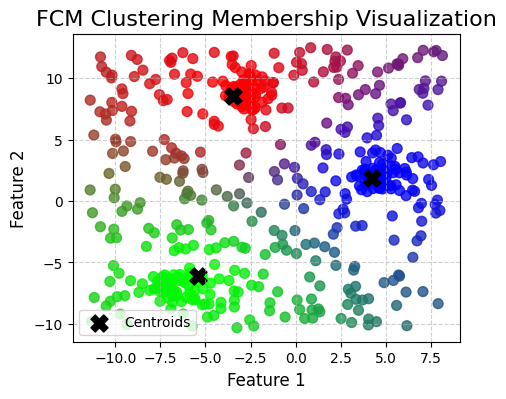

In [34]:
rgb_colors = U_FCM.T

# Create the scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=rgb_colors, alpha=0.8, s=50)

# Plot the centroids for context
plt.scatter(V_FCM[:, 0], V_FCM[:, 1], marker='X', s=150, c='black', linewidth=1, label='Centroids')

# Add titles and labels for clarity
plt.title('FCM Clustering Membership Visualization', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()